In [2]:
!pip install tensorflow

^C


In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
from scipy.optimize import curve_fit
from itertools import combinations
from skimage.morphology import skeletonize, thin
import operator
from sklearn.cluster import DBSCAN
import sys
sys.path.append(r"C:\Users\Lenovo\PycharmProjects\ML_2022\cv\ текстурно-структурное разложение\zz\utils")
from zz.utils_7344_01 import *
from zz.gan_struct_04a import Layer_06
from zz.gan_struct_04a import im2txtrTnzr04
import torch
from torch.nn import Linear
from zz.layers.Lambda import Lambda
from zz.utils.Regularizer import Regularizer
from enum import Enum

from torch_complex.tensor import ComplexTensor

In [2]:
class complex_algebra_00(im2txtrTnzr04):
    def __init__(self,Fi, param, device=None):
         
        super( complex_algebra_00, self).__init__(  param, device) 
        
        self.w_=param['w_']
        self.size_=param['imageSize']
         
        xv0, yv0 = np.meshgrid(range(self.input_shape[1]), range(self.input_shape[2]), sparse=False, indexing='ij') 
        xv=xv0-self.input_shape[1]/2
        yv=yv0-self.input_shape[2]/2
         
        q0=np.expand_dims(xv, [0,1])
        q1=np.expand_dims(yv, [0,1])
        q_=np.concatenate([q0,q1],0)
        self.features_1=self.get_features_01(q_)
        self.Rot_0=ComplexTensor(np.array([np.exp(np.pi*1j*Fi)])).to(self.device)
        self.Rot_0.requires_grad=True
        
        self.to(self.device)
    def rotate_00(self,Fi,i):
        a0=self.w_[i]
        a1=str(a0)+'_1'
         
        self.Rot_0=ComplexTensor(np.array([np.exp(2*np.pi*1j*Fi)])).to(self.device)        
        self.cube=ComplexTensor(self.features_1[a1][0,...],self.features_1[a1][1,...]).to(self.device)
        self.mean_=self.complex_mean(self.cube,[1,2]).view(-1, 1, 1).to(self.device)
        self.cube_rotated=((self.cube-self.mean_)*self.Rot_0+self.mean_).view(1, self.cube.shape[0], self.cube.shape[1],self.cube.shape[2])
        self.In_=torch.cat([self.cube_rotated.real,self.cube_rotated.imag],0)
        self.Out=self._modules['conv_T_'+a1] (self.In_.type(torch.float32))+torch.tensor([self.size_[1]/2,self.size_[1]/2]).view(2, 1, 1,1)
        return 0
    def get_zentrum_0(self,i):
        
        
        a0=self.w_[i]
        a1=str(a0)+'_1'
         
              
        self.cube=ComplexTensor(self.features_1[a1][0,...],self.features_1[a1][1,...]).to(self.device)
        
    
        self.mean_0=self.complex_mean(self.cube,[0]).view(-1, self.cube.shape[-2],self.cube.shape[-1]).to(self.device)
         
        a=torch.cat([self.mean_0.real,self.mean_0.imag],0)\
        +torch.tensor([self.size_[1]/2,self.size_[1]/2]).view(2,  1,1)
        self.mean_0=a.detach().numpy()
        return 0 

    
    def get_zentrum_1(self,i):
        
        
        a0=self.w_[i]
        a1=str(a0)+'_1'
         
              
        self.cube=ComplexTensor(self.features_1[a1][0,...],self.features_1[a1][1,...]).to(self.device)
        self.mean_0=self.complex_mean(self.cube,[1,2]).view(-1, 1, 1).to(self.device)       
     
        print(self.mean_0.shape)
        a=torch.cat([self.mean_0.real,self.mean_0.imag],-1)
        print(a.shape)
        
         
        a= a + torch.tensor([self.size_[1]/2,self.size_[1]/2]).view(1,  1,2)
        self.mean_0=a.detach().numpy()
        return 0 
    
    
    
    def rotate_01(self,Fi,i):
        a0=self.w_[i]
        a1=str(a0)+'_1'
         
        self.Rot_0=ComplexTensor(np.array([np.exp(2*np.pi*1j*Fi)])).to(self.device)        
        self.cube=ComplexTensor(self.features_1[a1][0,...],self.features_1[a1][1,...]).to(self.device)
        
    
        self.mean_=self.complex_mean(self.cube,[0]).view(-1, self.cube.shape[-2],self.cube.shape[-1]).to(self.device)
        
        
        
        self.cube_rotated=((self.cube-self.mean_)*self.Rot_0+self.mean_).view(1, self.cube.shape[0], self.cube.shape[1],self.cube.shape[2])
        self.In_=torch.cat([self.cube_rotated.real,self.cube_rotated.imag],0)
        self.Out=self._modules['conv_T_'+a1] (self.In_.type(torch.float32))\
        +torch.tensor([self.size_[1]/2,self.size_[1]/2]).view(2, 1, 1,1)
        return 0

    def shift_line_00(self,pt_0):
        out_=self.Out[:,0,:,:].detach().numpy()

        pt_2=np.array(pt_0)
        pt_3=[]
        for pt in pt_2:
            #print(pt)
            pt_1=[int(out_[0,pt[0],pt[1]]),int(out_[1,pt[0],pt[1]])]
            #print(pt_1)
            pt_3.append(pt_1)
        pt_3=np.array(pt_3)
        return pt_3
        
        
    def complex_mean(self,x,axis):
        return ComplexTensor(torch.mean(x.real ,axis),torch.mean(x.imag ,axis) )   
    def get_features_03(self, x, name_of_w):
        x = self._contiguous(x)                    
        x_=self._modules['conv_T_'+name_of_w] (x)
        return x_

###################################
param = {'imageSize':[1, 256, 256, 1] ,'alpha': 0.01 ,'w_' :[32,16,4,32,64],'dilation':[1,1,1,1,1]}
decomposition_xtxr=complex_algebra_00(1/25,param,'cpu')
#decomposition_xtxr.summary() 

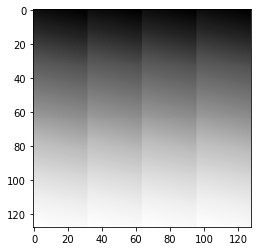

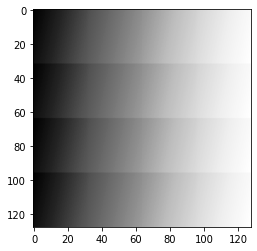

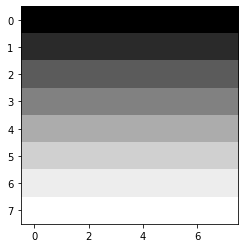

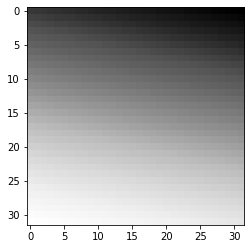

In [3]:
decomposition_xtxr.rotate_01(1/29,0)
ai_2(decomposition_xtxr.Out[0,0,:32*4,:32*4].detach().numpy()) 
ai_2(decomposition_xtxr.Out[1,0,:32*4,:32*4].detach().numpy()) 
ai_2(decomposition_xtxr.Out[0,0,::32,::32].detach().numpy()) 
ai_2(decomposition_xtxr.Out[0,0,:32,:32].detach().numpy())

In [4]:
x_=torch.Tensor(np.random.rand(1,1,256,256  ))
x1_=decomposition_xtxr.get_features_01(x_)
print(x1_['32_1'].shape)
print(x1_['16_1'].shape)
print(x1_['4_1'].shape)
param = {'imageSize':[1, 256, 256, 1] ,'alpha': 0.01 ,'w_' :[32,16,4,2,64],'dilation':[1,1,1,1,1]}
decomposition_xtxr=complex_algebra_00(1/25,param,'cpu')

torch.Size([1, 1024, 8, 8])
torch.Size([1, 256, 16, 16])
torch.Size([1, 16, 64, 64])


In [32]:
decomposition_xtxr.get_zentrum_0(0)

0

In [33]:
decomposition_xtxr.mean_0

array([[[ 15.5,  15.5,  15.5,  15.5,  15.5,  15.5,  15.5,  15.5],
        [ 47.5,  47.5,  47.5,  47.5,  47.5,  47.5,  47.5,  47.5],
        [ 79.5,  79.5,  79.5,  79.5,  79.5,  79.5,  79.5,  79.5],
        [111.5, 111.5, 111.5, 111.5, 111.5, 111.5, 111.5, 111.5],
        [143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 143.5],
        [175.5, 175.5, 175.5, 175.5, 175.5, 175.5, 175.5, 175.5],
        [207.5, 207.5, 207.5, 207.5, 207.5, 207.5, 207.5, 207.5],
        [239.5, 239.5, 239.5, 239.5, 239.5, 239.5, 239.5, 239.5]],

       [[ 15.5,  47.5,  79.5, 111.5, 143.5, 175.5, 207.5, 239.5],
        [ 15.5,  47.5,  79.5, 111.5, 143.5, 175.5, 207.5, 239.5],
        [ 15.5,  47.5,  79.5, 111.5, 143.5, 175.5, 207.5, 239.5],
        [ 15.5,  47.5,  79.5, 111.5, 143.5, 175.5, 207.5, 239.5],
        [ 15.5,  47.5,  79.5, 111.5, 143.5, 175.5, 207.5, 239.5],
        [ 15.5,  47.5,  79.5, 111.5, 143.5, 175.5, 207.5, 239.5],
        [ 15.5,  47.5,  79.5, 111.5, 143.5, 175.5, 207.5, 239.5],
        

In [34]:
decomposition_xtxr.get_zentrum_1(0)

torch.Size([1024, 1, 1])
torch.Size([1024, 1, 2])


0

In [35]:
decomposition_xtxr.mean_0

array([[[112., 112.]],

       [[112., 113.]],

       [[112., 114.]],

       ...,

       [[143., 141.]],

       [[143., 142.]],

       [[143., 143.]]], dtype=float32)

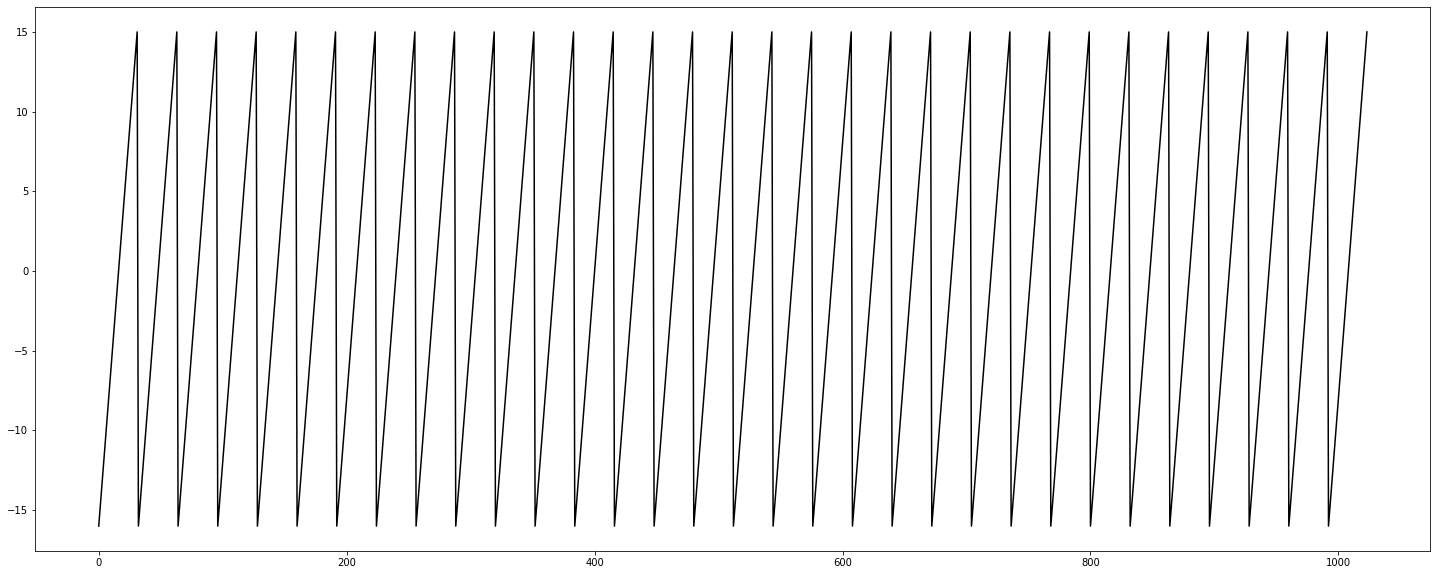

In [26]:
plot_im(decomposition_xtxr.mean_0.imag.detach().numpy())